In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Esercizio 1
### Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [2]:
df = pd.read_csv(r"C:\Users\Utente\Dropbox\PC\Desktop\Laboratory of Computational Physics\data_000637.txt")

In [33]:
N = 20000 #I have choosed 20000 rows
df_reduced = df[:N] 

In [34]:
df_reduced

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Absolute time (ns)
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
19995,1,0,27,3869200366,2513,29,3.447458e+14
19996,1,0,63,3869200366,2517,6,3.447458e+14
19997,1,0,32,3869200366,2519,5,3.447458e+14
19998,1,0,17,3869200366,2522,21,3.447458e+14


# Esercizio 2 
### Find out the number of BX in a ORBIT (the value 'x').

In [28]:
x = df["BX_COUNTER"].max()+1  
print("the number of BX in a ORBIT: ",x)

the number of BX in a ORBIT:  3564


# Esercizio 3
### Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [6]:
df_copia = df.copy()

In [7]:
#last moment of measurement

ORBIT_CNT_max = df_copia["ORBIT_CNT"].max()
df_copia = df_copia[df_copia["ORBIT_CNT"]==ORBIT_CNT_max]

BX_COUNTER_max = df_copia["BX_COUNTER"].max()
df_copia = df_copia[df_copia["BX_COUNTER"]==BX_COUNTER_max]

TDC_MEAS_max = df_copia["TDC_MEAS"].max()
df_copia = df_copia[df_copia["TDC_MEAS"]==TDC_MEAS_max]

df_copia

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
1310718,1,0,139,3869211171,769,0


In [8]:
df_copia["Absolute time (ns)"] = df_copia["ORBIT_CNT"]*x*25 + df_copia["BX_COUNTER"]*25 + df_copia["TDC_MEAS"]*(25/30)
df_copia

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Absolute time (ns)
1310718,1,0,139,3869211171,769,0,3.447467e+14


In [9]:
df_copia2 = df.copy()

In [10]:
#first moment of measurement

ORBIT_CNT_min = df_copia2["ORBIT_CNT"].min()
df_copia2 = df_copia2[df_copia2["ORBIT_CNT"]==ORBIT_CNT_min]

BX_COUNTER_min = df_copia2["BX_COUNTER"].min()
df_copia2 = df_copia2[df_copia2["BX_COUNTER"]==BX_COUNTER_min]

TDC_MEAS_min = df_copia2["TDC_MEAS"].min()
df_copia2 = df_copia2[df_copia2["TDC_MEAS"]==TDC_MEAS_min]

df_copia2

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26


In [11]:
df_copia2["Absolute time (ns)"] = df_copia2["ORBIT_CNT"]*x*25 + df_copia2["BX_COUNTER"]*25 + df_copia2["TDC_MEAS"]*(25/30)
df_copia2

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Absolute time (ns)
0,1,0,123,3869200167,2374,26,3.447457e+14


In [41]:
#duration of measurement = last time - first time

first_time = df_copia2["Absolute time (ns)"].iloc[0]
last_time = df_copia["Absolute time (ns)"].iloc[0]
duration = last_time-first_time
duration_sec = (last_time-first_time)*(10**9)

print("The data taking lasted: ",duration,"ns", "≃", duration_sec,"s")

The data taking lasted:  980416253.3125 ns ≃ 9.804162533125e+17 s


# Esercizio 4
### Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [13]:
df["Absolute time (ns)"] = df["ORBIT_CNT"]*x*25 + df["BX_COUNTER"]*25 + df["TDC_MEAS"]*(25/30)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Absolute time (ns)
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14
1310718,1,0,139,3869211171,769,0,3.447467e+14


# Esercizio 5 
### Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [47]:
df_replaced = df.copy()

In [48]:
import random

In [49]:
df_replaced["HEAD"] = df_replaced["HEAD"].apply(lambda x : random.randrange(0, 2, 1))
df_replaced

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Absolute time (ns)
0,0,0,123,3869200167,2374,26,3.447457e+14
1,0,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,0,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
19995,1,0,27,3869200366,2513,29,3.447458e+14
19996,0,0,63,3869200366,2517,6,3.447458e+14
19997,0,0,32,3869200366,2519,5,3.447458e+14
19998,1,0,17,3869200366,2522,21,3.447458e+14


# Esercizio 6
### Create a new DataFrame that contains only the rows with HEAD=1.

In [46]:
df_replaced[df_replaced["HEAD"]==1]

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Absolute time (ns)
8,1,0,62,3869200167,2774,21,3.447457e+14
9,1,0,60,3869200167,2788,7,3.447457e+14
14,1,0,56,3869200167,2789,3,3.447457e+14
15,1,1,139,3869200167,2797,0,3.447457e+14
20,1,1,10,3869200167,2789,14,3.447457e+14
...,...,...,...,...,...,...,...
19987,1,0,62,3869200366,1980,28,3.447458e+14
19988,1,0,48,3869200366,1981,3,3.447458e+14
19991,1,0,124,3869200366,2163,17,3.447458e+14
19993,1,0,42,3869200366,2392,22,3.447458e+14


# Esercizio 7
### Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

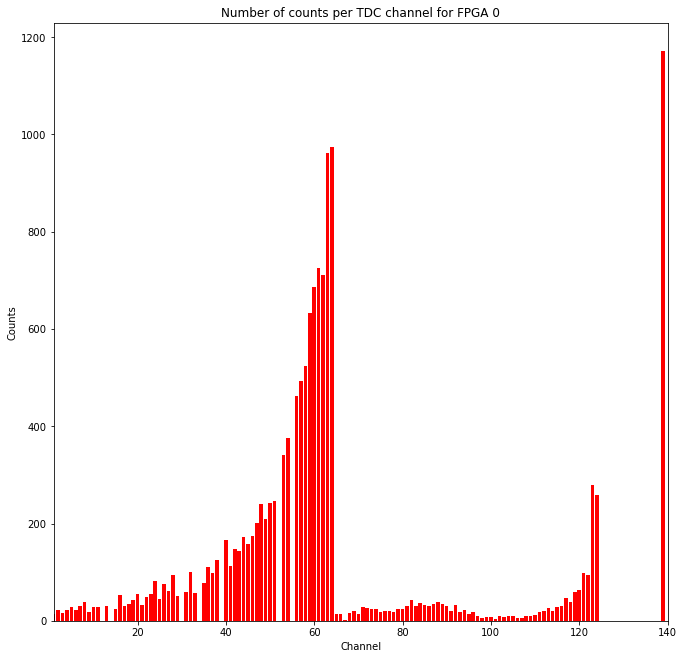

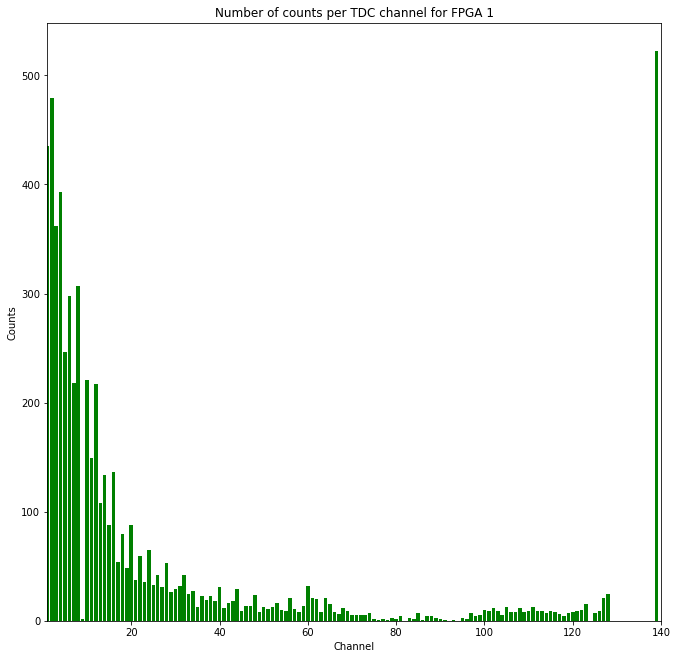

In [56]:
FPGA_0 = df[df["FPGA"] == 0].copy() #select all the rows with FPGA = 0
FPGA_1 = df[df["FPGA"] == 1].copy() #select all the rows with FPGA = 1

m_0 = FPGA_0["TDC_CHANNEL"].min() 
M_0 = FPGA_0["TDC_CHANNEL"].max()

m_1 = FPGA_1["TDC_CHANNEL"].min()
M_1 = FPGA_1["TDC_CHANNEL"].max()


hist_0, bin_edges_0 = np.histogram(np.sort(FPGA_0["TDC_CHANNEL"]), bins = range(m_0, M_0+2))
#print(hist_0)
#print(bin_edges_0)
plt.figure(figsize=(11,11))
plt.bar(bin_edges_0[:-1],hist_0, width = 0.8, color = "red")
plt.xlim(min(bin_edges_0),max(bin_edges_0))
plt.title("Number of counts per TDC channel for FPGA 0")
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.show()




hist_1, bin_edges_1 = np.histogram(np.sort(FPGA_1["TDC_CHANNEL"]), bins = range(m_1, M_1+2))
#print(hist_1)
#print(bin_edges_1)
plt.figure(figsize=(11,11))
plt.bar(bin_edges_1[:-1],hist_1, width = 0.8, color = "green")
plt.xlim(min(bin_edges_1),max(bin_edges_1))
plt.title("Number of counts per TDC channel for FPGA 1")
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.show()


# Esercizio 8
### Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [19]:
df_noisy = df.copy()

In [20]:
df_noisy["count"] = 1

In [21]:
TDC_channels = df_noisy.groupby(["TDC_CHANNEL"]).count()["count"].sort_values(ascending=False)
print("The top 3 TDC channels with most counts are:\n")
TDC_channels[:3]

The top 3 TDC channels with most counts are:



TDC_CHANNEL
139    108059
64      66020
63      64642
Name: count, dtype: int64

# Esecizio 9
### Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [22]:
df_orbits = df.copy()

In [23]:
print("There are",len(df_orbits["ORBIT_CNT"].unique().tolist()), "unique orbits")

There are 11001 unique orbits


To count the number of unique orbits with at least one measurement from TDC_CHANNEL=139 I first isolate all the channels that satisfy this requirement in a new df.

In [24]:
TDC_Channel_139 = df_orbits[df_orbits["TDC_CHANNEL"]==139]

Then I applay the unique method to this new df.

In [25]:
print("There are",len(TDC_Channel_139["ORBIT_CNT"].unique().tolist()), "unique orbits with at least one measurement from TDC_CHANNEL=139")

There are 10976 unique orbits with at least one measurement from TDC_CHANNEL=139
